# Part 1-A
Calculating the average GDP for all states during 2014-2015.
Inspecting which states have been growing consistently and those that have been struggling
Identifying the top 5 and bottom 5 states based on GDP

In [18]:
#Importing all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
#Readng the first dataset that contains state wise GDP
swgdp = pd.read_csv("Data set 1.csv") 
swgdp.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


### Cleaning the data by removing unnecessary columns

In [20]:
#Dropping the row: "GSDP - CURRENT PRICES (` in Crore)" for 2016-2017
swgdp.drop(swgdp.index[5],inplace = True)

#Dropping the row:"(% Growth over previous year)" for 2016-2017
swgdp.drop(swgdp.index[-1],inplace = True)
swgdp

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


### Calculating mean of the average growth of all states

In [24]:
#Storing the % growth over previous year in another data frame
growthoverpy = swgdp.iloc[6:10]
#Calculation the average growth of all states during 2013-2014,2014-2015,2015-2016
#Taking the mean of the states
growthoverpy.mean().head()

Andhra Pradesh       14.033333
Arunachal Pradesh    14.413333
Assam                12.650000
Bihar                13.603333
Chhattisgarh         13.703333
dtype: float64

In [22]:
#Deleting West Bengal since West Bengal had all NaN values and All_India GDP column as we do not need it for analyses
growthoverpy = growthoverpy.drop(['West Bengal1','All_India GDP'],axis=1)

#Converting the series into a pandas dataframe to make plotting easy
growthoverpy_mean = pd.DataFrame(growthoverpy.mean())

#Assigning a column name for mean growth to make data visualization easier
growthoverpy_mean.columns = (['% Growth of States over PY'])

#Sorting the % growth by descending
temp = growthoverpy_mean.sort_values(by = "% Growth of States over PY",ascending=False)


### Using a barplot to visualize the GDP across states

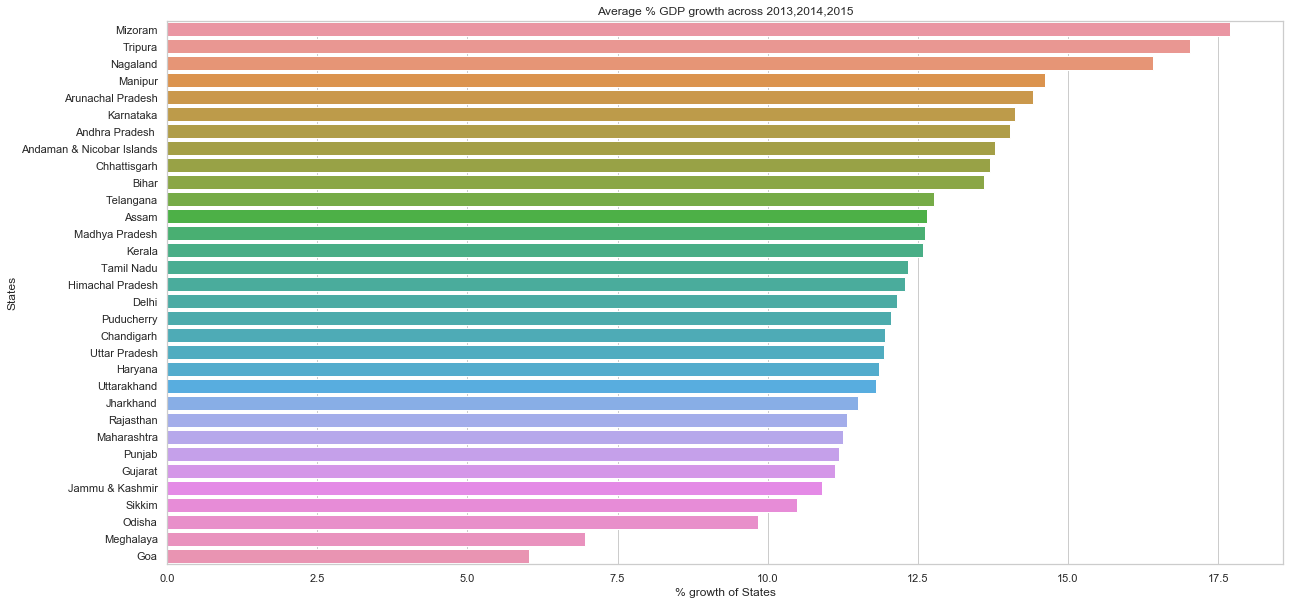

In [23]:
#Using the Seaborn library to plot a graph

sns.set(style='whitegrid')
plt.figure(figsize=(20,10))

#Using a barplot to analyse the highest growth across States
#In this case, plotting the states on the y-axis as there are many States and plotting % growth on the x-axis

sns.barplot(x="% Growth of States over PY",y=temp.index,data=temp)
plt.title("Average % GDP growth across 2013,2014,2015")
plt.ylabel("States")
plt.xlabel("% growth of States")
plt.show()

####  We can understand from both graphs that the States having highest % GDP growth are Mizoram, Tripura, Nagaland, Arunachal Pradesh and Manipur

### Average growth rate of my homestate: Karnataka

In [25]:
#Finding mean of the nation during the years
mn = swgdp.iloc[6:10]
print(mn[['All_India GDP']].mean())
print(growthoverpy[['Karnataka']].mean())

All_India GDP    11.203333
dtype: float64
Karnataka    14.12
dtype: float64


#### Karnataka has a higher average GDP than the national's average GDP. It is approximately 26% higher than the nation's average!

### Further inspection on top 5 and bottom 5 states based on GDP

In [31]:
#Identifying the top five and bottom five states for the year 2015-2016
df = swgdp.iloc[4:5]

#Re-ordering the table to visualise more clearly
df = df.melt(id_vars=['Duration'])
df.head()


,Duration,variable,value
0,2015-16,Items Description,GSDP - CURRENT PRICES (` in Crore)
1,2015-16,Andhra Pradesh,609934
2,2015-16,Arunachal Pradesh,18784
3,2015-16,Assam,224234
4,2015-16,Bihar,413503


In [32]:
#Removing the unnecessary top and bottom row and removing the NaN values
df = (df.drop([0],axis=0))
df = (df.drop([34],axis=0))
df = df.dropna()

#Sorting the values to look at the top 5 and bottom 5
df = df.sort_values(by = 'value',ascending = False)

### Top 5 States having highest GDP:

In [33]:
df.head(5)

,Duration,variable,value
24,2015-16,Tamil Nadu,1.21267e+06
27,2015-16,Uttar Pradesh,1.1538e+06
12,2015-16,Karnataka,1.02707e+06
7,2015-16,Gujarat,994316
1,2015-16,Andhra Pradesh,609934


### Bottom 5 States having lowest GDP:

In [34]:
df.tail(5)

,Duration,variable,value
31,2015-16,Chandigarh,30304
17,2015-16,Meghalaya,26745
33,2015-16,Puducherry,26533
2,2015-16,Arunachal Pradesh,18784
23,2015-16,Sikkim,16637


#### Hence from the above table we can see the top 5 states with the highest GDP are Tamil Nadu, Uttar Pradesh, Karnataka, Gujarat, and Andhra Pradesh; and the bottom 5 are Chandigarh, Meghalaya, Puducherry, Arunachal Pradesh, Sikkim for the duration of 2015-2016

# Part 1-B
Plotting the GDP per capita for all States and identifying the top 5 and bottom 5 states based on GSP per Capita.
Plotting the contribution of Primary, Secondary and Tertiary sectors as a percentage of total GDP.
Categorizing the states into 4 categories based on per capita GDP.
Finding the top sub-sectors under each category.
Plotting the contribution of the top sub-sectors as a percentage of GSDP for each category.

### Reading all files

In [37]:
AP = pd.read_csv(".//GSVA_Files/NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv")
ARP = pd.read_csv(".//GSVA_Files/NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv")
AS = pd.read_csv(".//GSVA_Files/NAD-Assam-GSVA_cur_2015-16.csv")
BH = pd.read_csv(".//GSVA_Files/NAD-Bihar-GSVA_cur_2015-16.csv")
CH = pd.read_csv(".//GSVA_Files/NAD-Chhattisgarh-GSVA_cur_2016-17.csv")
GOA = pd.read_csv(".//GSVA_Files/NAD-Goa-GSVA_cur_2015-16.csv")
GU = pd.read_csv(".//GSVA_Files/NAD-Gujarat-GSVA_cur_2015-16.csv")
HA = pd.read_csv(".//GSVA_Files/NAD-Haryana-GSVA_cur_2016-17.csv")
HP = pd.read_csv(".//GSVA_Files/NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv")
J = pd.read_csv(".//GSVA_Files/NAD-Jharkhand-GSVA_cur_2015-16.csv")
KA = pd.read_csv(".//GSVA_Files/NAD-Karnataka-GSVA_cur_2015-16.csv")
K = pd.read_csv(".//GSVA_Files/NAD-Kerala-GSVA_cur_2015-16.csv")
MP = pd.read_csv(".//GSVA_Files/NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv")
MA = pd.read_csv(".//GSVA_Files/NAD-Maharashtra-GSVA_cur_2014-15.csv")
MANI = pd.read_csv(".//GSVA_Files/NAD-Manipur-GSVA_cur_2014-15.csv",encoding = "ISO-8859-1")
MEGH = pd.read_csv(".//GSVA_Files/NAD-Meghalaya-GSVA_cur_2016-17.csv")
MIZ = pd.read_csv(".//GSVA_Files/NAD-Mizoram-GSVA_cur_2014-15.csv")
NAG = pd.read_csv(".//GSVA_Files/NAD-Nagaland-GSVA_cur_2014-15.csv")
ODI = pd.read_csv(".//GSVA_Files/NAD-Odisha-GSVA_cur_2016-17.csv")
PUN = pd.read_csv(".//GSVA_Files/NAD-Punjab-GSVA_cur_2014-15.csv")
RG = pd.read_csv(".//GSVA_Files/NAD-Rajasthan-GSVA_cur_2014-15.csv")
SIKK = pd.read_csv(".//GSVA_Files/NAD-Sikkim-GSVA_cur_2015-16.csv")
TN = pd.read_csv(".//GSVA_Files/NAD-Tamil_Nadu-GSVA_cur_2016-17.csv")
TEL = pd.read_csv(".//GSVA_Files/NAD-Telangana-GSVA_cur_2016-17.csv")
TRIP = pd.read_csv(".//GSVA_Files/NAD-Tripura-GSVA_cur_2014-15.csv")
UP = pd.read_csv(".//GSVA_Files/NAD-Uttar_Pradesh-GSVA_cur_2015-16.csv")
UTT = pd.read_csv(".//GSVA_Files/NAD-Uttarakhand-GSVA_cur_2015-16.csv")

### Retaining only the columns that are required into each state dataset

In [38]:
#Retaining only the year of 2014-15 and the sectors that contribute to GDSP
AP = AP[['Item','2014-15']]
ARP = ARP[['2014-15']]
AS = AS[['2014-15']]
BH = BH[['2014-15']]
CH = CH[['2014-15']]
GOA = GOA[['2014-15']]
GU = GU[['2014-15']]
HA = HA[['2014-15']]
HP = HP[['2014-15']]
J = J[['2014-15']]
KA = KA[['2014-15']]
K = K[['2014-15']]
MP = MP[['2014-15']]
MA = MA[['2014-15']]
MANI = MANI[['2014-15']]
MEGH = MEGH[['2014-15']]
MIZ = MIZ[['2014-15']]
NAG = NAG[['2014-15']]
ODI = ODI[['2014-15']]
PUN = PUN[['2014-15']]
RG = RG[['2014-15']]
SIKK = SIKK[['2014-15']]
TN = TN[['2014-15']]
TEL = TEL[['2014-15']]
TRIP = TRIP[['2014-15']]
UTT = UTT[['2014-15']]
UP = UP[['2014-15']]

### Renaming columns to call out state names for easy analyses

In [39]:
AP.columns = ['Item','Andhra Pradesh']
ARP.columns = ['Arunachal Pradesh']
AS.columns = ['Assam']
BH.columns = ['Bihar']
CH.columns = ['Chhatisgarh']
GOA.columns = ['Goa']
GU.columns = ['Gujarat']
HA.columns = ['Haryana']
HP.columns = ['Himachal Pradesh']
J.columns = ['Jharkhand']
KA.columns = ['Karnataka']
K.columns = ['Kerala']
MP.columns = ['Madhya Pradesh']
MA.columns = ['Maharashtra']
MANI.columns = ['Manipur']
MEGH.columns = ['Meghalaya']
MIZ.columns = ['Mizoram']
NAG.columns = ['Nagaland']
ODI.columns = ['Odisha']
PUN.columns = ['Punjab']
RG.columns = ['Rajasthan']
SIKK.columns = ['Sikkim']
TN.columns = ['Tamil Nadu']
TEL.columns = ['Telangana']
TRIP.columns = ['Tripura']
UP.columns = ['Uttar Pradesh']
UTT.columns = ['Uttrakhand']

### Concatenating all files into one single dataset

In [40]:
m1 = pd.concat([AP,ARP],axis = 1,join='outer')
m2 = pd.concat([m1,AS],axis = 1,join='outer')
m3 = pd.concat([m2,BH,CH,GOA,GU,HA,HP,J,KA],axis = 1,join='outer')
m4 = pd.concat([m3,K,MP,MANI,MEGH,MA,MIZ,NAG,ODI],axis = 1,join='outer')
master = pd.concat([m4,PUN,RG,SIKK,TN,TEL,TRIP,UTT,UP],axis = 1,join='outer')

In [41]:
#Allocating the GDP per capita of states into a separate dataset
per_cap = master.iloc[32:33]

#Re-arranging the dataset to make it easy to plot
m = per_cap.melt(id_vars=['Item'])
m = m.sort_values(by='value',ascending = False)
m.head()

,Item,variable,value
5,Per Capita GSDP (Rs.),Goa,271793.0
21,Per Capita GSDP (Rs.),Sikkim,240274.0
7,Per Capita GSDP (Rs.),Haryana,164077.0
11,Per Capita GSDP (Rs.),Kerala,154778.0
25,Per Capita GSDP (Rs.),Uttrakhand,153076.0


### Plotting the GDP per capita for states and the top 5 and bottom 5 using a barplot

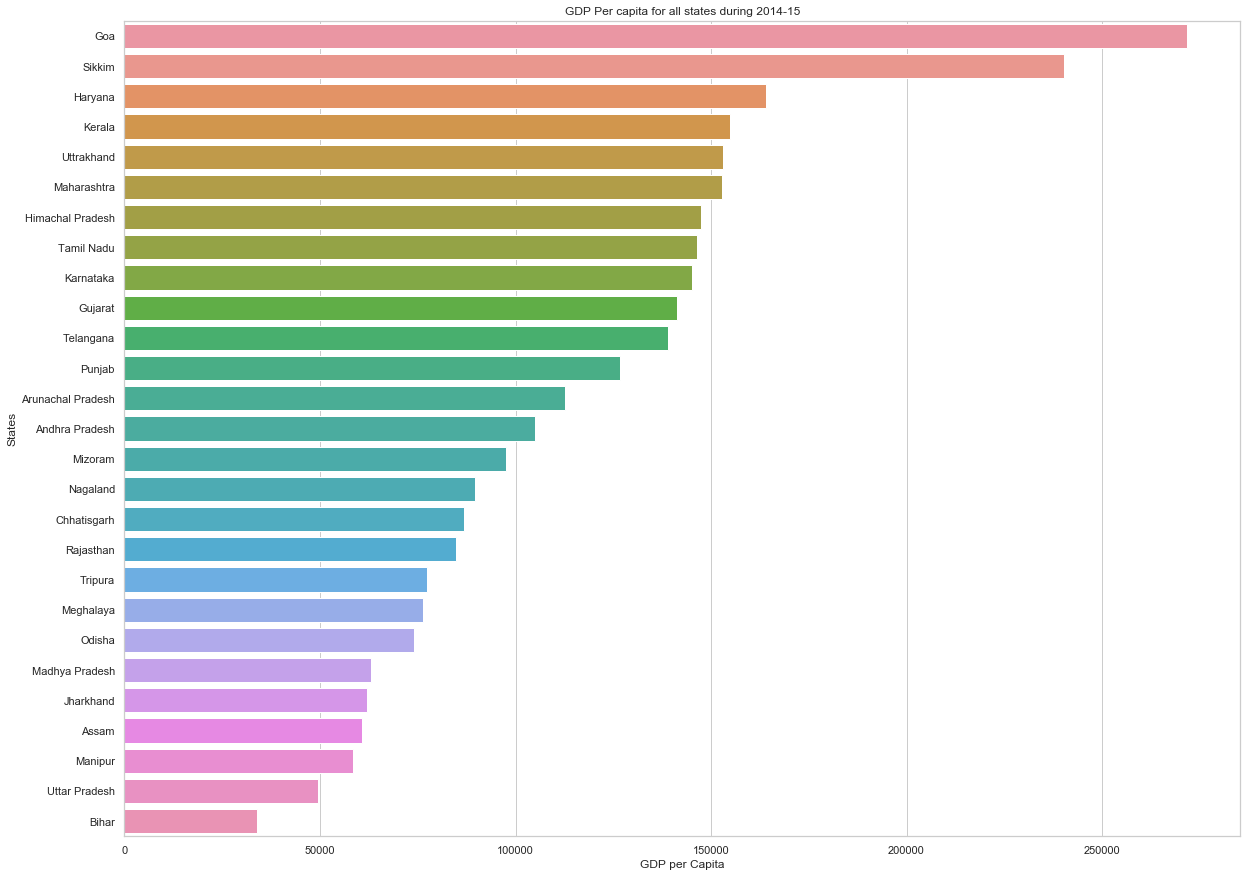

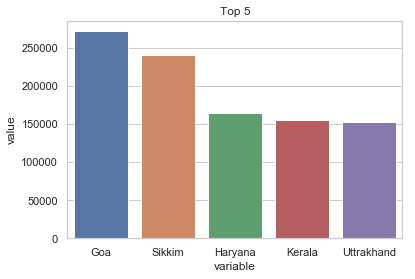

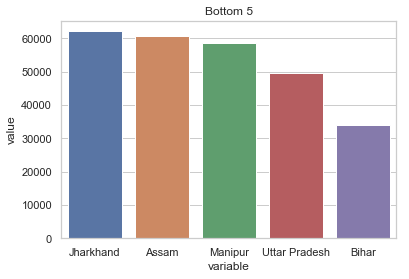

In [42]:
top_5 = m.head(5)
bottom_5 = m.tail(5)

sns.set_style('whitegrid')
plt.figure(figsize=(20,15))
sns.barplot(x='value',y='variable',data=m)
plt.title("GDP Per capita for all states during 2014-15")
plt.ylabel("States")
plt.xlabel("GDP per Capita")
plt.show() 

plt.figure(figsize =  (6,4))
plt.title("Top 5")
plt.ylabel("States")
plt.xlabel("GDP per Capita")
sns.barplot(x='variable',y='value',data=top_5) 
plt.show()

plt.figure(figsize =  (6,4))
plt.title("Bottom 5")
plt.ylabel("States")
plt.xlabel("GDP per Capita")
sns.barplot(x='variable',y='value',data=bottom_5)

plt.show() 

#### From the above graphs we can see that Goa, Sikkim, Haryana, Uttarakhand, and Himachal Pradesh have contributed to the highest GDP per capita, with Goa being the largest contributor

#### We can also see that Tripura, Jharkhand, Assam, Uttar Pradesh and Bihar have contributed to the least GDP per capita, with Bihar being the lowest among all states

### Ratio of highest per capita GDP to the lowest per capita GDP

In [76]:
#We can see from the above graphs that the state that has the highest per capita GDP is Goa and the lowest is Bihar
Ratio = pd.concat([top_5.head(1),bottom_5.tail(1)],axis=0,join='outer')
Ratio = Ratio.drop(['Item'],axis=1)
Ratio.index = Ratio['variable']
Ratio = Ratio.drop(['variable'],axis=1)
Ratio.loc['Ratio of highest to lowest per capita GDP'] = Ratio.loc['Goa'] / Ratio.loc['Bihar']
Ratio

,value
variable,
Goa,271793.000000
Bihar,33954.000000
Ratio of highest to lowest per capita GDP,8.004742


### Finding the Primary, Secondary and Tertiary contributions as a percentage of GDSP

In [77]:
#Storing only the sectors in a separate dataframe
Percent_contrib = master.iloc[[6,10,26,30]]
Percent_contrib.index = Percent_contrib['Item']
Percent_contrib = Percent_contrib.drop(['Item'],axis=1)

In [78]:
#Calculating the percentage contributions for each sector
Percent_contrib.loc['Percent Contribution of Primary'] = 100*(Percent_contrib.loc['Primary'] / Percent_contrib.loc['Gross State Domestic Product'])
Percent_contrib.loc['Percent Contribution of Secondary'] = 100*(Percent_contrib.loc['Secondary'] / Percent_contrib.loc['Gross State Domestic Product'])
Percent_contrib.loc['Percent Contribution of Tertiary'] = 100*(Percent_contrib.loc['Tertiary'] / Percent_contrib.loc['Gross State Domestic Product'])
Percent_contrib

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhatisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jharkhand,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttrakhand,Uttar Pradesh
Item,,,,,,,,,,,,,,,,,,,,,
Primary,1.630372e+07,7.169590e+05,5.326697e+06,8.019997e+06,6.400817e+06,3.121290e+05,1.588719e+07,8.040424e+06,1.548366e+06,5.248354e+06,...,6.161780e+05,9.009306e+06,9.296070e+06,1.911378e+07,1.387760e+05,1.332977e+07,9.133354e+06,9.422160e+05,1.845972e+06,2.599926e+07
Secondary,1.048888e+07,2.874890e+05,4.033091e+06,5.984896e+06,8.238886e+06,1.547536e+06,3.302354e+07,1.256141e+07,4.119162e+06,6.241471e+06,...,2.123610e+05,8.989693e+06,7.904914e+06,1.302879e+07,8.452530e+05,3.284189e+07,9.924001e+06,4.843930e+05,7.642865e+06,2.554872e+07
Tertiary,2.203294e+07,6.318440e+05,9.307109e+06,2.217997e+07,7.588778e+06,1.738217e+06,3.022038e+07,1.922657e+07,4.133326e+06,8.133341e+06,...,9.929560e+05,1.225626e+07,1.671780e+07,2.601581e+07,4.831030e+05,5.334379e+07,2.847141e+07,1.484709e+06,5.587975e+06,4.596896e+07
Gross State Domestic Product,5.264684e+07,1.676119e+06,1.980980e+07,3.739199e+07,2.349818e+07,4.063307e+06,8.950273e+07,4.374621e+07,1.043688e+07,2.171072e+07,...,1.841424e+06,3.219709e+07,3.680109e+07,6.121945e+07,1.520933e+06,1.092564e+08,5.111776e+07,2.966662e+06,1.619853e+07,1.043371e+08
Percent Contribution of Primary,3.096808e+01,4.277495e+01,2.688920e+01,2.144844e+01,2.723963e+01,7.681649e+00,1.775051e+01,1.837971e+01,1.483553e+01,2.417402e+01,...,3.346204e+01,2.798174e+01,2.526031e+01,3.122175e+01,9.124399e+00,1.220045e+01,1.786728e+01,3.176014e+01,1.139592e+01,2.491851e+01
Percent Contribution of Secondary,1.992310e+01,1.715206e+01,2.035907e+01,1.600582e+01,3.506180e+01,3.808563e+01,3.689668e+01,2.871429e+01,3.946737e+01,2.874834e+01,...,1.153243e+01,2.792082e+01,2.148011e+01,2.128212e+01,5.557464e+01,3.005947e+01,1.941400e+01,1.632788e+01,4.718246e+01,2.448671e+01
Percent Contribution of Tertiary,4.185045e+01,3.769685e+01,4.698235e+01,5.931744e+01,3.229517e+01,4.277838e+01,3.376476e+01,4.395025e+01,3.960308e+01,3.746233e+01,...,5.392327e+01,3.806635e+01,4.542747e+01,4.249599e+01,3.176360e+01,4.882442e+01,5.569768e+01,5.004645e+01,3.449681e+01,4.405811e+01


In [79]:
#Re-arranging the Percent_contrib dataframe in order to plot easier 
P = Percent_contrib.transpose()
P = Percent_contrib.drop(['Gross State Domestic Product','Primary','Secondary','Tertiary'])
P.head()

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhatisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jharkhand,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttrakhand,Uttar Pradesh
Item,,,,,,,,,,,,,,,,,,,,,
Percent Contribution of Primary,30.968080,42.774946,26.889201,21.448437,27.239629,7.681649,17.750506,18.379705,14.835527,24.174023,...,33.462038,27.981738,25.260312,31.221746,9.124399,12.200454,17.867280,31.76014,11.395924,24.918511
Percent Contribution of Secondary,19.923102,17.152064,20.359070,16.005825,35.061805,38.085628,36.896684,28.714286,39.467373,28.748340,...,11.532434,27.920823,21.480109,21.282116,55.574637,30.059475,19.413996,16.32788,47.182463,24.486707
Percent Contribution of Tertiary,41.850453,37.696846,46.982347,59.317437,32.295173,42.778382,33.764756,43.950252,39.603084,37.462331,...,53.923268,38.066351,45.427474,42.495993,31.763595,48.824418,55.697682,50.04645,34.496805,44.058108


### Generating a heatmap to display the contribution of each of the sectors in all states

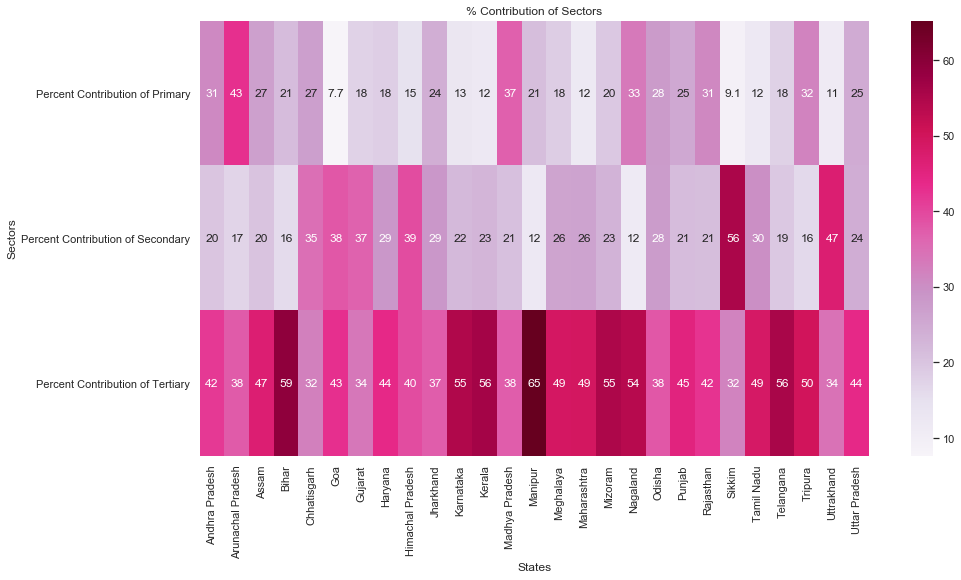

In [80]:
plt.figure(figsize=(15,8))
sns.heatmap(P,cmap="PuRd",annot=True)
plt.title("% Contribution of Sectors")
plt.xlabel("States")
plt.ylabel("Sectors")
plt.show()

### Classifying states into 4 categories based on per capita GDP

In [81]:
#breaking them into categories using quantile
Q = pd.qcut(m['value'],[0,0.20,0.50,0.85,1.0],labels=['C4','C3','C2','C1'])
Q = m.merge(Q.to_frame(),left_index=True,right_index=True)
Q.head(10)

,Item,variable,value_x,value_y
5,Per Capita GSDP (Rs.),Goa,271793.0,C1
21,Per Capita GSDP (Rs.),Sikkim,240274.0,C1
7,Per Capita GSDP (Rs.),Haryana,164077.0,C1
11,Per Capita GSDP (Rs.),Kerala,154778.0,C1
25,Per Capita GSDP (Rs.),Uttrakhand,153076.0,C2
15,Per Capita GSDP (Rs.),Maharashtra,152853.0,C2
8,Per Capita GSDP (Rs.),Himachal Pradesh,147330.0,C2
22,Per Capita GSDP (Rs.),Tamil Nadu,146503.0,C2
10,Per Capita GSDP (Rs.),Karnataka,145141.0,C2
6,Per Capita GSDP (Rs.),Gujarat,141263.0,C2


### Sub-setting each of the categories along with their sectors

In [104]:
#Subsetting the dataframe according to categories (C1,C2,C3,C4) & dropping unnecessary columns

#Fromn the table above we can see which of the states belong to each of the categories
C1_sub = master.loc[:,['Item','Goa','Sikkim','Haryana','Kerala']]

#Dropping unnecessary rows that won't be needed while plotting
C1 = C1_sub.drop(C1_sub.index[[6,10,26,27,28,29,31,32]])

C2_sub = master.loc[:,['Item','Uttrakhand','Maharashtra','Himachal Pradesh','Tamil Nadu','Karnataka','Gujarat','Telangana','Punjab','Arunachal Pradesh']]
C2 = C2_sub.drop(C2_sub.index[[6,10,26,27,28,29,31,32]])

C3_sub = master.loc[:,['Item','Andhra Pradesh','Mizoram','Nagaland','Chhatisgarh','Rajasthan','Tripura','Meghalaya','Odisha']]
C3 = C3_sub.drop(C3_sub.index[[6,10,26,27,28,29,31,32]])

C4_sub = master.loc[:,['Item','Madhya Pradesh','Jharkhand','Assam','Manipur','Uttar Pradesh','Bihar']]
C4 = C4_sub.drop(C4_sub.index[[6,10,26,27,28,29,31,32]])

## Inspecting C1

In [105]:
#Sorting the values in the dataframe to find the top contributing sub-sectors
C1 = C1.sort_values(by=['Goa','Sikkim','Haryana','Kerala'],ascending = False)
C1.index = C1['Item']
C1 = C1.drop(['Item'],axis=1)
C1 = C1.fillna(0)

#Taking the sum of the first 6 sub sectors 
C1.loc["Sum of top 6 Sectors"]= C1.loc['Manufacturing']+C1.loc['Real estate, ownership of dwelling & professional services']+C1.loc['Trade, repair, hotels and restaurants']+C1.loc['Public administration']+C1.loc["Trade & repair services"]+C1.loc["Agriculture, forestry and fishing"]
C1.loc["% of top 6 sectors"] = 100*(C1.loc['Sum of top 6 Sectors']/ C1.loc["Gross State Domestic Product"])

#Taking the sum of the first 7 sub sectors
C1.loc["Sum of top 7 Sectors"]= C1.loc['Manufacturing']+C1.loc['Real estate, ownership of dwelling & professional services']+C1.loc['Trade, repair, hotels and restaurants']+C1.loc['Public administration']+C1.loc["Trade & repair services"]+C1.loc["Agriculture, forestry and fishing"]+C1.loc["Financial services"]
C1.loc["% of top 7 sectors"] = 100*(C1.loc['Sum of top 7 Sectors']/ C1.loc["Gross State Domestic Product"])

#Taking the sum of the first 8 sub sectors
C1.loc["Sum of top 8 Sectors"]= C1.loc['Manufacturing']+C1.loc['Real estate, ownership of dwelling & professional services']+C1.loc['Trade, repair, hotels and restaurants']+C1.loc['Public administration']+C1.loc["Trade & repair services"]+C1.loc["Agriculture, forestry and fishing"]+C1.loc["Financial services"]+C1.loc["Electricity, gas, water supply & other utility services"]
C1.loc["% of top 8 sectors"] = 100*(C1.loc['Sum of top 8 Sectors']/ C1.loc["Gross State Domestic Product"])
C1.tail(6)

,Goa,Sikkim,Haryana,Kerala
Item,,,,
Gross State Domestic Product,4.063307e+06,1.520933e+06,4.374621e+07,5.260023e+07
Manufacturing,1.177608e+06,5.506970e+05,7.756921e+06,4.273567e+06
"Real estate, ownership of dwelling & professional services",4.070990e+05,7.533000e+04,6.970183e+06,7.287633e+06
"Trade, repair, hotels and restaurants",3.809270e+05,7.056800e+04,4.986319e+06,8.557345e+06
Public administration,3.464860e+05,1.195140e+05,1.036377e+06,2.068915e+06
Trade & repair services,3.434920e+05,6.462400e+04,4.817784e+06,7.763847e+06
"Agriculture, forestry and fishing",3.085070e+05,1.374470e+05,8.015238e+06,5.930617e+06
Financial services,2.336180e+05,2.107900e+04,1.671486e+06,2.010306e+06
"Electricity, gas, water supply & other utility services",2.041100e+05,2.124990e+05,1.101919e+06,4.824700e+05


#### Since the % of sum of top 7 sectors is closest at reflecting 80% of GSDP, the top 7 sub-sectors is considered

In [84]:
#Calculating the % contribution of each of the sectors in C1
C1.loc["% of Manufacturing"] = 100*(C1.loc["Manufacturing"] / C1.loc["Gross State Domestic Product"])
C1.loc["% of Real Estate"] = 100*(C1.loc["Real estate, ownership of dwelling & professional services"] / C1.loc["Gross State Domestic Product"])
C1.loc["% of Trade"] = 100*(C1.loc["Trade, repair, hotels and restaurants"] / C1.loc["Gross State Domestic Product"])
C1.loc["% of Public Admin"] = 100*(C1.loc["Public administration"] / C1.loc["Gross State Domestic Product"])
C1.loc["% of Trade & repair services"] = 100*(C1.loc["Trade & repair services"] / C1.loc["Gross State Domestic Product"])
C1.loc["% of Agriculture"] = 100*(C1.loc["Agriculture, forestry and fishing"] / C1.loc["Gross State Domestic Product"])
C1.loc["% of Public Admin"] = 100*(C1.loc["Public administration"] / C1.loc["Gross State Domestic Product"])
C1.loc["% of Financial services"] = 100*(C1.loc["Financial services"] / C1.loc["Gross State Domestic Product"])
C1.tail(10)

,Goa,Sikkim,Haryana,Kerala
Item,,,,
% of top 7 sectors,7.869789e+01,6.833036e+01,8.058826e+01,7.203815e+01
Sum of top 8 Sectors,3.401847e+06,1.251758e+06,3.635623e+07,3.837470e+07
% of top 8 sectors,8.372114e+01,8.230198e+01,8.310715e+01,7.295538e+01
% of Manufacturing,2.898152e+01,3.620784e+01,1.773164e+01,8.124617e+00
% of Real Estate,1.001891e+01,4.952881e+00,1.593323e+01,1.385476e+01
% of Trade,9.374802e+00,4.639784e+00,1.139829e+01,1.626865e+01
% of Public Admin,8.527192e+00,7.857940e+00,2.369067e+00,3.933281e+00
% of Trade & repair services,8.453508e+00,4.248971e+00,1.101303e+01,1.476010e+01
% of Agriculture,7.592510e+00,9.037019e+00,1.832213e+01,1.127489e+01


In [85]:
#Retaining only the % contributioon of top sectors in C1, so as to make visualizations easier

C1 = C1.iloc[[-1,-2,-3,-4,-5,-6,-7]]
C1 = C1.transpose()
C1

Item,% of Financial services,% of Agriculture,% of Trade & repair services,% of Public Admin,% of Trade,% of Real Estate,% of Manufacturing
Goa,5.749455,7.592510,8.453508,8.527192,9.374802,10.018908,28.981517
Sikkim,1.385926,9.037019,4.248971,7.857940,4.639784,4.952881,36.207841
Haryana,3.820871,18.322132,11.013033,2.369067,11.398289,15.933228,17.731642
Kerala,3.821858,11.274888,14.760101,3.933281,16.268646,13.854755,8.124617


#### Creating a stacked bar chart to show the % contributions of top sub-sectors in C1

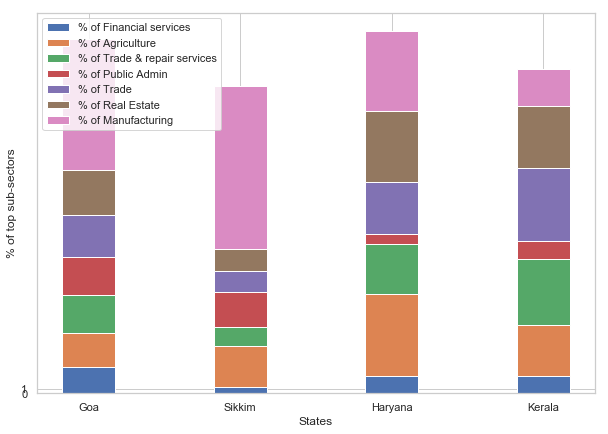

In [90]:
States_C1 = C1.index
Finance_C1 = C1.iloc[:,0]
Agri_C1 = C1.iloc[:,1]
Trade_Repair_C1 = C1.iloc[:,2]
Public_C1 = C1.iloc[:,3]
Trade_C1 = C1.iloc[:,4]
Real_Estate_C1 = C1.iloc[:,5]
Manufacturing_C1 = C1.iloc[:,6]
indx = np.arange(len(C1))
width = 0.35
plt.figure(figsize=(10,7))
p2 = plt.bar(x=indx, height = Finance_C1, width = 0.35)
p3 = plt.bar(x=indx, height = Agri_C1, width = 0.35 , bottom = Finance_C1)
p4 = plt.bar(x=indx, height = Trade_Repair_C1, width=0.35, bottom =Finance_C1+Agri_C1)
p5 = plt.bar(x=indx, height = Public_C1, width=0.35, bottom =Finance_C1+Agri_C1+Trade_Repair_C1)
p6 = plt.bar(x=indx, height = Trade_C1, width=0.35, bottom =Finance_C1+Agri_C1+Trade_Repair_C1+Public_C1)
p7 = plt.bar(x=indx, height = Real_Estate_C1, width=0.35, bottom =Trade_C1+Finance_C1+Agri_C1+Trade_Repair_C1+Public_C1)
p8 = plt.bar(x=indx, height = Manufacturing_C1, width=0.35, bottom =Real_Estate_C1+Trade_C1+Finance_C1+Agri_C1+Trade_Repair_C1+Public_C1)

plt.xlabel("States")
plt.ylabel("% of top sub-sectors")
plt.xticks(indx,States_C1)
plt.yticks(np.arange(0,2,1))
plt.legend(C1.columns)
plt.show()

#### For Goa and Sikkim in C1, Manufacturing has the highest contribution to their GSDP, whereas for Haryana, Agriculture sector contributes the highest. And Kerala is highly affected by Trade

#### The contribution of Financial services is the least among all states

## Inspecting C2

In [106]:
C2 = C2.sort_values(by=['Uttrakhand','Maharashtra','Himachal Pradesh','Tamil Nadu','Karnataka','Gujarat','Telangana','Punjab','Arunachal Pradesh'],ascending = False)
C2.index = C2['Item']
C2 = C2.drop(['Item'],axis=1)
C2 = C2.fillna(0)

#Taking the sum of top 5 sub-sectors
C2.loc["Sum of top 5 Sectors"]= C2.loc['Manufacturing']+ C2.loc['Trade, repair, hotels and restaurants']+C2.loc['Agriculture, forestry and fishing']+C2.loc['Trade & repair services']+C2.loc['Transport, storage, communication & services related to broadcasting']
C2.loc["% of top 5 sectors"] = 100*(C2.loc['Sum of top 5 Sectors'] / C2.loc["Gross State Domestic Product"])
C2.tail(2)

,Uttrakhand,Maharashtra,Himachal Pradesh,Tamil Nadu,Karnataka,Gujarat,Telangana,Punjab,Arunachal Pradesh
Item,,,,,,,,,
Sum of top 5 Sectors,1.181155e+07,8.995920e+07,5.720510e+06,6.331578e+07,4.578630e+07,6.277084e+07,2.976869e+07,2.464904e+07,864657.00000
% of top 5 sectors,7.291741e+01,5.019704e+01,5.481054e+01,5.795157e+01,4.967117e+01,7.013288e+01,5.823550e+01,6.697910e+01,51.58685


#### Since the % contribution of top 5 sub-sectors is only 72%, the top 6 is considered

In [107]:
C2.loc["Sum of top 6 Sectors"]= C2.loc['Manufacturing']+ C2.loc['Trade, repair, hotels and restaurants']+C2.loc['Agriculture, forestry and fishing']+C2.loc['Trade & repair services']+C2.loc['Transport, storage, communication & services related to broadcasting']+C2.loc["Other services"]
C2.loc["% of top 6 sectors"] = 100*(C2.loc['Sum of top 6 Sectors'] / C2.loc["Gross State Domestic Product"])
C2.tail(2)

,Uttrakhand,Maharashtra,Himachal Pradesh,Tamil Nadu,Karnataka,Gujarat,Telangana,Punjab,Arunachal Pradesh
Item,,,,,,,,,
Sum of top 6 Sectors,1.279398e+07,1.007656e+08,6.643674e+06,7.074590e+07,5.109447e+07,6.589426e+07,3.392692e+07,2.795208e+07,1.083385e+06
% of top 6 sectors,7.898234e+01,5.622696e+01,6.365575e+01,6.475219e+01,5.542974e+01,7.362262e+01,6.637011e+01,7.595449e+01,6.463652e+01


In [108]:
#Calculating the % contribution of each of the sectors in C2
C2.loc["% of Manufacturing"] = 100*(C2.loc["Manufacturing"] / C2.loc["Gross State Domestic Product"])
C2.loc["% of Trade"] = 100*(C2.loc["Trade, repair, hotels and restaurants"] / C2.loc["Gross State Domestic Product"])
C2.loc["% of Agriculture"] = 100*(C2.loc["Agriculture, forestry and fishing"] / C2.loc["Gross State Domestic Product"])
C2.loc["% of Trade & repair"] = 100*(C2.loc["Trade & repair services"] / C2.loc["Gross State Domestic Product"])
C2.loc["% of Transport"] = 100*(C2.loc["Transport, storage, communication & services related to broadcasting"] / C2.loc["Gross State Domestic Product"])
C2.loc["% of Other Services"] = 100*(C2.loc["Other services"] / C2.loc["Gross State Domestic Product"])
C2.tail(6)

,Uttrakhand,Maharashtra,Himachal Pradesh,Tamil Nadu,Karnataka,Gujarat,Telangana,Punjab,Arunachal Pradesh
Item,,,,,,,,,
% of Manufacturing,36.214720,18.782371,24.371625,17.312303,14.052952,26.912630,12.429556,13.016846,1.558362
% of Trade,10.760891,8.838184,5.897319,11.803286,9.754583,11.372517,12.705186,12.010294,3.604816
% of Agriculture,9.886225,9.193380,14.515652,11.957415,12.171368,15.384971,14.851003,25.232177,40.934862
% of Trade & repair,9.470446,7.972060,4.734768,10.299251,8.162093,11.372517,11.197923,11.416108,3.388542
% of Transport,6.585123,5.411042,5.291179,6.579314,5.530178,5.090247,7.051836,5.303672,2.100269
% of Other Services,6.064933,6.029927,8.845211,6.800624,5.758562,3.489741,8.134606,8.975389,13.049670


#### Creating a stacked bar chart to show the % contributions of top sub-sectors in C2

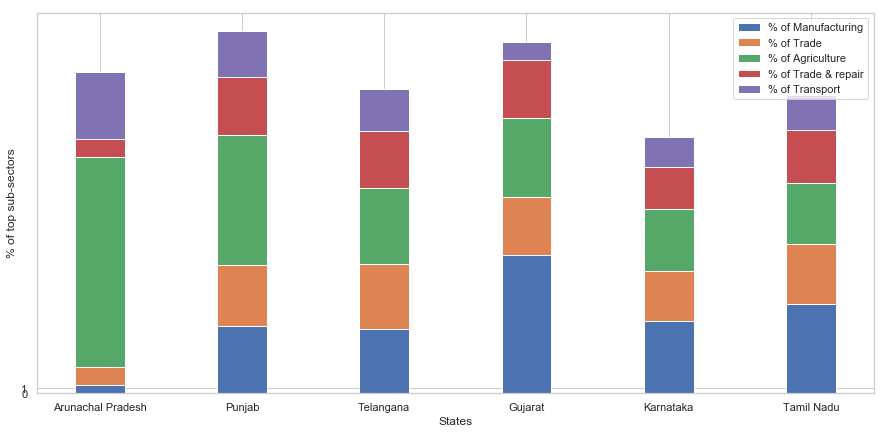

In [111]:
#Retaining only the % contributioon of top sectors in C2, so as to make visualizations easier

C2 = C2.iloc[[-1,-2,-3,-4,-5,-6]]
C2 = C2.transpose()
States_C2 = C2.index
Other_Services_C2 = C2.iloc[:,0]
Transport_C2 = C2.iloc[:,1]
Trade_Repair_C2 = C2.iloc[:,2]
Agri_C2 = C2.iloc[:,3]
Manufacturing_C2 = C2.iloc[:,5]
indx = np.arange(len(C2))
width = 0.35
plt.figure(figsize=(15,7))
p2 = plt.bar(x=indx, height = Other_Services_C2, width = 0.35)
p3 = plt.bar(x=indx, height = Transport_C2, width = 0.35 , bottom = Other_Services_C2)
p4 = plt.bar(x=indx, height = Trade_Repair_C2, width=0.35, bottom =Transport_C2+Other_Services_C2)
p5 = plt.bar(x=indx, height = Agri_C2, width=0.35, bottom =Trade_Repair_C2+Transport_C2+Other_Services_C2)
p6 = plt.bar(x=indx, height = Manufacturing_C2, width=0.35, bottom =Agri_C2+Trade_Repair_C2+Transport_C2+Other_Services_C2)

plt.xlabel("States")
plt.ylabel("% of top sub-sectors")
plt.xticks(indx,States_C2)
plt.yticks(np.arange(0,2,1))
plt.legend(C2.columns)
plt.show()

#### Agriculture contributes the highest GSDP for Arunachal Pradesh, Punjab and Telangana. However, contribution of manufacturing is the least in Arunachal Pradesh
#### However, Gujarat is affected the most by Manufacturing, followed by Karnataka and Tamil Nadu
#### Across all states in C2, it appears that Transport sector contributes the least among top sectors, and this is likely due to the lack of metros and less public transport

## Inspecting C3

In [98]:
C3 = C3.sort_values(by=['Andhra Pradesh','Mizoram','Nagaland','Chhatisgarh','Rajasthan','Tripura','Meghalaya','Odisha'],ascending = False)
C3.index = C3['Item']
C3 = C3.drop(['Item'],axis=1)
C3 = C3.fillna(0)

#Taking the sum of the first 5 sub sectors 
C3.loc["Sum of top 5 Sectors"]= C3.loc['Agriculture, forestry and fishing']+C3.loc['Crops']+C3.loc['Transport, storage, communication & services related to broadcasting']+C3.loc['Manufacturing']+C3.loc["Construction"]
C3.loc["% of top 5 sectors"] = 100*(C3.loc['Sum of top 5 Sectors']/ C3.loc["Gross State Domestic Product"])
C3.tail(2)

,Andhra Pradesh,Mizoram,Nagaland,Chhatisgarh,Rajasthan,Tripura,Meghalaya,Odisha
Item,,,,,,,,
Water transport,9.420000e+04,331.000000,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.034900e+04
Storage,1.870000e+04,0.000000,8.900000e+01,1.667500e+04,1.658400e+04,2.540000e+02,4.160000e+02,2.267500e+04
Air transport,1.490000e+04,144.000000,4.153000e+03,9.507000e+03,1.346900e+04,0.000000e+00,1.443000e+03,1.535400e+04
Sum of top 5 Sectors,3.712707e+07,527913.000000,1.235661e+06,1.447444e+07,3.843820e+07,1.759896e+06,1.321509e+06,2.099626e+07
% of top 5 sectors,7.052098e+01,45.669861,6.710356e+01,6.159812e+01,6.278757e+01,5.932243e+01,5.414230e+01,6.521165e+01


#### The % of sum of top 5 sub-sectors only comes to 70% of GDSP, hence considering the sum of top 6

In [99]:
C3.loc["Sum of top 6 Sectors"]= C3.loc['Agriculture, forestry and fishing']+C3.loc['Crops']+C3.loc['Transport, storage, communication & services related to broadcasting']+C3.loc['Manufacturing']+C3.loc["Construction"]+C3.loc["Real estate, ownership of dwelling & professional services"]
C3.loc["% of top 6 sectors"] = 100*(C3.loc['Sum of top 6 Sectors']/ C3.loc["Gross State Domestic Product"])
C3.tail(4)

,Andhra Pradesh,Mizoram,Nagaland,Chhatisgarh,Rajasthan,Tripura,Meghalaya,Odisha
Item,,,,,,,,
Sum of top 5 Sectors,3.712707e+07,527913.000000,1.235661e+06,1.447444e+07,3.843820e+07,1.759896e+06,1.321509e+06,2.099626e+07
% of top 5 sectors,7.052098e+01,45.669861,6.710356e+01,6.159812e+01,6.278757e+01,5.932243e+01,5.414230e+01,6.521165e+01
Sum of top 6 Sectors,4.153248e+07,582981.000000,1.395312e+06,1.693660e+07,4.489020e+07,1.950600e+06,1.471918e+06,2.334497e+07
% of top 6 sectors,7.888883e+01,50.433805,7.577353e+01,7.207623e+01,7.332670e+01,6.575067e+01,6.030456e+01,7.250645e+01


In [100]:
#Calculating the % contribution of each of the sectors in C3
C3.loc["% of Agri"] = 100*(C3.loc["Agriculture, forestry and fishing"] / C3.loc["Gross State Domestic Product"])
C3.loc["% of Crops"] = 100*(C3.loc["Crops"] / C3.loc["Gross State Domestic Product"])
C3.loc["% of Transport"] = 100*(C3.loc["Transport, storage, communication & services related to broadcasting"] / C3.loc["Gross State Domestic Product"])
C3.loc["% of Manufacturing"] = 100*(C3.loc["Manufacturing"] / C3.loc["Gross State Domestic Product"])
C3.loc["% of Construction"] = 100*(C3.loc["Construction"] / C3.loc["Gross State Domestic Product"])
C3.loc["% of Real Estate"] = 100*(C3.loc["Real estate, ownership of dwelling & professional services"] / C3.loc["Gross State Domestic Product"])
C3.tail(6)

,Andhra Pradesh,Mizoram,Nagaland,Chhatisgarh,Rajasthan,Tripura,Meghalaya,Odisha
Item,,,,,,,,
% of Agri,28.148727,18.773579,33.012332,16.804906,24.574534,26.960436,15.016386,19.948938
% of Crops,14.993329,10.087868,20.409477,11.121589,12.534319,13.401965,9.149843,13.611900
% of Transport,9.643473,4.549312,4.209840,3.709947,6.230800,5.256952,6.071312,6.317390
% of Manufacturing,8.874732,0.733520,0.996294,18.599709,10.703429,7.706473,17.748761,17.871890
% of Construction,8.860720,11.525581,8.475615,11.361965,8.744486,5.996605,6.155997,7.461531
% of Real Estate,8.367850,4.763944,8.669975,10.478114,10.539130,6.428235,6.162265,7.294802


#### Creating a stacked bar chart to show the % contributions of top sub-sectors in C3

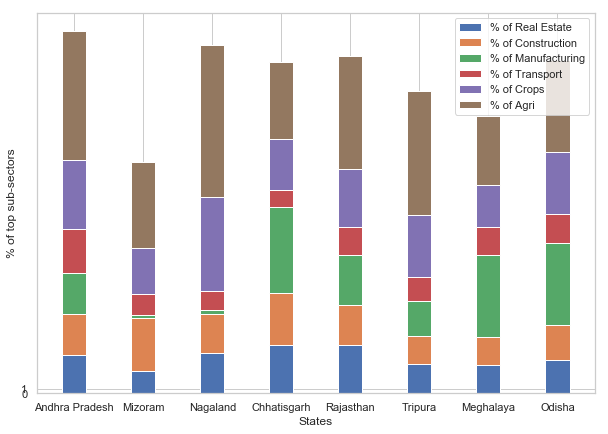

In [101]:
#Retaining only the % contributioon of top sectors in C3, so as to make visualizations easier
C3 = C3.iloc[[-1,-2,-3,-4,-5,-6]]
C3 = C3.transpose()


States_C3 = C3.index
Real_Estate_C3 = C3.iloc[:,0]
Construction_C3 = C3.iloc[:,1]
Manufacturing_C3 = C3.iloc[:,2]
Transport_C3 = C3.iloc[:,3]
Crops_C3 = C3.iloc[:,4]
Agri_C3 = C3.iloc[:,5]
indx = np.arange(len(C3))
width = 0.35
plt.figure(figsize=(10,7))
p2 = plt.bar(x=indx, height = Real_Estate_C3, width = 0.35)
p3 = plt.bar(x=indx, height = Construction_C3, width = 0.35 , bottom = Real_Estate_C3)
p4 = plt.bar(x=indx, height = Manufacturing_C3, width=0.35, bottom = Construction_C3+Real_Estate_C3)
p5 = plt.bar(x=indx, height = Transport_C3, width=0.35, bottom = Manufacturing_C3+Construction_C3+Real_Estate_C3)
p6 = plt.bar(x=indx, height = Crops_C3, width=0.35, bottom =Transport_C3+Manufacturing_C3+Construction_C3+Real_Estate_C3)
p6 = plt.bar(x=indx, height = Agri_C3, width=0.35, bottom =Crops_C3+Transport_C3+Manufacturing_C3+Construction_C3+Real_Estate_C3)

plt.xlabel("States")
plt.ylabel("% of top sub-sectors")
plt.xticks(indx,States_C3)
plt.yticks(np.arange(0,2,1))
plt.legend(C3.columns)
plt.show()

#### Agriculture sector dominates the contribution for all states iin C3 except Odisha and Chhatisgarh, where Manufacturing dominates
#### Just like the above categories, Transport sector ranks the least among the top contributing sub-sectors
#### The contribution of the real-estate and Construction sectors is also less that shows that investment in these sectors will help increase GSDP

## Inspecting C4

In [102]:
C4 = C4.sort_values(by=['Madhya Pradesh','Jharkhand','Assam','Manipur','Uttar Pradesh','Bihar'],ascending = False)
C4.index = C4['Item']
C4 = C4.drop(['Item'],axis=1)
C4 = C4.fillna(0)

#Taking the sum of the first 4 sub sectors 
C4.loc["Sum of top 4 Sectors"]= C4.loc['Agriculture, forestry and fishing']+C4.loc['Crops']+C4.loc['Trade, repair, hotels and restaurants']+C4.loc['Trade & repair services']
C4.loc["% of top 4 sectors"] = 100*(C4.loc['Sum of top 4 Sectors']/ C4.loc["Gross State Domestic Product"])
C4.loc["% of Agriculture"] = 100*(C4.loc["Agriculture, forestry and fishing"] / C4.loc["Gross State Domestic Product"])
C4.loc["% of Crops"] = 100*(C4.loc["Crops"] / C4.loc["Gross State Domestic Product"])
C4.loc["% of Trade"] = 100*(C4.loc["Trade, repair, hotels and restaurants"] / C4.loc["Gross State Domestic Product"])
C4.loc["% of Trade & repair"] = 100*(C4.loc["Trade & repair services"] /C4.loc["Gross State Domestic Product"])
C4.tail(6)

,Madhya Pradesh,Jharkhand,Assam,Manipur,Uttar Pradesh,Bihar
Item,,,,,,
Sum of top 4 Sectors,3.986280e+07,9.137086e+06,1.260950e+07,1.126310e+06,5.922635e+07,2.716989e+07
% of top 4 sectors,8.270605e+01,4.208560e+01,6.365283e+01,6.242448e+01,5.676441e+01,7.266233e+01
% of Agriculture,3.368519e+01,1.479023e+01,1.946283e+01,2.123511e+01,2.405448e+01,2.126629e+01
% of Crops,2.742016e+01,9.647152e+00,1.459149e+01,1.255811e+01,1.554117e+01,1.253808e+01
% of Trade,1.111560e+01,9.172239e+00,1.507918e+01,1.457371e+01,9.044953e+00,1.991970e+01
% of Trade & repair,1.048510e+01,8.475979e+00,1.451933e+01,1.405755e+01,8.123800e+00,1.893826e+01


#### The sum of top 4 sub-sectors contribute to 82% of the GSDP

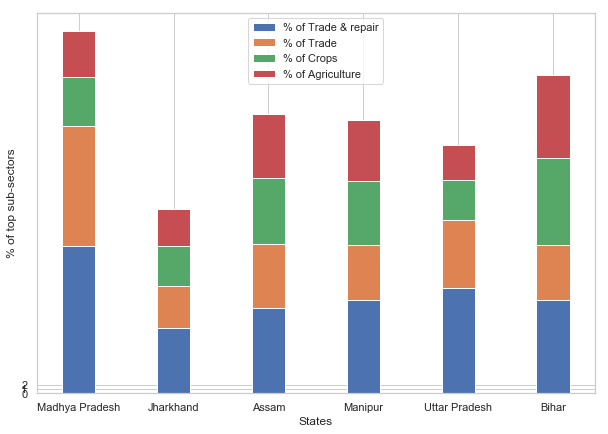

In [103]:
#Retaining only the % contributioon of top sectors in C4, so as to make visualizations easier
C4 = C4.iloc[[-1,-2,-3,-4]]
C4 = C4.transpose()
States = C4.index
Agri_C4 = C4.iloc[:,3]
Crops_C4 = C4.iloc[:,2]
Trade_C4 = C4.iloc[:,1]
Tradeandrepair_C4 = C4.iloc[:,0]
indx = np.arange(len(C4))
width = 0.35
plt.figure(figsize=(10,7))
p1 = plt.bar(x=indx, height = Agri_C4, width=0.35)
p2 = plt.bar(x=indx, height = Crops_C4, width = 0.35, bottom=Agri_C4)
p3 = plt.bar(x=indx, height = Trade_C4, width = 0.35 , bottom = Crops_C4+Agri_C4)
p4 = plt.bar(x=indx, height = Tradeandrepair_C4, width=0.35, bottom =Trade_C4+Crops_C4+Agri_C4)
plt.xlabel("States")
plt.ylabel("% of top sub-sectors")
plt.xticks(indx,States)
plt.yticks(np.arange(0,3,1))
plt.legend(C4.columns)
plt.show()

#### Madhya Pradesh is influenced by the Trade and repair sector mainly, followed by crops and agriculture
#### Trade & repair services sector has dominance across all the states in C4
#### The number of sectors that affect the GSDP in C4 are lesser than the other categories that show that there is room for advancement in all the other sectors that have less than 20% contribution to GSDP
#### The contribution of Agriculture and crops should improve to increase GSDP

In [113]:
#Looking at the bottom least contributing sectors of C4 
C4 = C4.sort_values(by=['Madhya Pradesh','Jharkhand','Assam','Manipur','Uttar Pradesh','Bihar'],ascending = False)
C4.tail(10)

,Item,Madhya Pradesh,Jharkhand,Assam,Manipur,Uttar Pradesh,Bihar
8,"Electricity, gas, water supply & other utility...",1272905,337489,296587,27490.0,2030625,345168
3,Forestry and logging,965588,445149,261987,45831.0,1404936,550132
21,Communication & services related to broadcasting,905381,323214,357619,42017.0,1914737,919427
15,Railways,498734,472702,252509,6.0,1618742,462413
13,Hotels & restaurants,303890,151163,110904,9313.0,961104,366982
4,Fishing and aquaculture,121277,108947,529539,35243.0,380730,653224
19,Services incidental to transport,36694,17436,35739,2441.0,16323,166600
20,Storage,29012,306,10308,NaN,171696,10618
18,Air transport,26746,6716,26223,6288.0,36582,13599
17,Water transport,0,0,4502,NaN,681,2228


#### From the table above, it is clear that C4 is least affected by the storage, air and water transport sectors. The railways and Hotels sectors also contribute less. This is also likely due to less investment in the contruction sector as well as the tourism sector. 

# Part 2

Analyses of a correlation between GDP per capita and high school drop out rates for all states

In [114]:
#Reading data set 2
df = pd.read_csv(".//Data set 2.csv")
df = df[['Sl. No.','Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]
df = df.fillna(0)
df.head()

,Sl. No.,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,1,A & N Islands,1.21,1.69,9.87
1,2,Andhra Pradesh,4.35,5.20,15.71
2,3,Arunachal Pradesh,10.89,6.71,17.11
3,4,Assam,7.44,10.51,27.06
4,5,Bihar,2.09,4.08,25.90


In [115]:
#Using a data set from Part 1b to show GDP per capita for all states
#Creating a new dataframe by retaining only States and GDP per capita columns
Temp = m.drop(['Item'],axis=1)
Temp.columns = ['States','GDP Per Capita']
Temp.head()

,States,GDP Per Capita
5,Goa,271793.0
21,Sikkim,240274.0
7,Haryana,164077.0
11,Kerala,154778.0
25,Uttrakhand,153076.0


In [116]:
#Removing an unecessary column to clean the dataframe before merging
df = df.drop(['Sl. No.'],axis=1)

#Renaming the column containing states so as to merge easier
df = df.rename(columns={'Level of Education - State':'States'})
df.head()

,States,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A & N Islands,1.21,1.69,9.87
1,Andhra Pradesh,4.35,5.20,15.71
2,Arunachal Pradesh,10.89,6.71,17.11
3,Assam,7.44,10.51,27.06
4,Bihar,2.09,4.08,25.90


### Merging the two files to analyse correlation

In [117]:
df = pd.merge(df,Temp,how='left',on='States')
df.head()

,States,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,GDP Per Capita
0,A & N Islands,1.21,1.69,9.87,NaN
1,Andhra Pradesh,4.35,5.20,15.71,104977.0
2,Arunachal Pradesh,10.89,6.71,17.11,112718.0
3,Assam,7.44,10.51,27.06,60621.0
4,Bihar,2.09,4.08,25.90,33954.0


In [118]:
df = df.fillna(0)

### Correlating between high school drop out rates and GDP per capita

In [119]:
T = df.corr()
round(T,3)

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,GDP Per Capita
Primary - 2014-2015,1.000,0.551,0.227,-0.046
Upper Primary - 2014-2015,0.551,1.000,0.590,-0.169
Secondary - 2014-2015,0.227,0.590,1.000,-0.085
GDP Per Capita,-0.046,-0.169,-0.085,1.000


### Using a heatmap to show correlations between drop out rates and GDP per capita

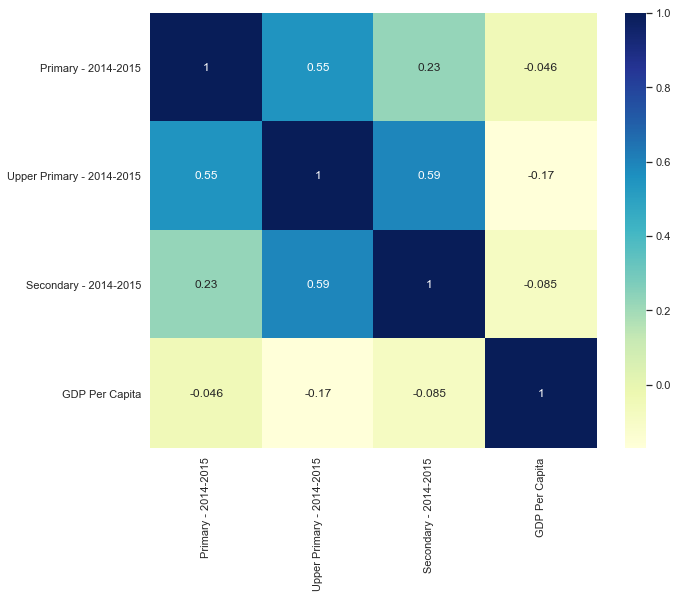

In [120]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(T, cmap="YlGnBu", annot=True)
plt.show()

#### The correlation between GDP per capita for high school drop outs is negative that shows that when the drop out rates are high, the GDP decreases. And when drop out rates are low, the GDP increases. 
#### The highest correlation is between drop out rates in Upper Primary and GDP per capita. 
#### The least correlation is between drop out rates in Primary and GDP per capita